This notebook is part of the various tests for xanespy. It's intended to allow for visual evaluation of fits, etc.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import pandas as pd
import os
import xanespy as xp
import numpy as np

from skimage import transform

# Set some directories
SSRL_DIR = 'txm-data-ssrl'
# APS_DIR = os.path.join(TEST_DIR, 'txm-data-aps')
# PTYCHO_DIR = os.path.join(TEST_DIR, 'ptycho-data-als/NS_160406074')

# test_math.XanesMathTest.test_guess_kedge_params
The code below will print two lines: one the actual data and one is the predicted k-edge. They should be more-or-less on top of each other.

KEdgeParams(scale=0.24362057995632241, voffset=0.45036467910755279, E0=8333, sigw=0.5, bg_slope=0, ga=0.74918229021227933, gb=17.0, gc=4)


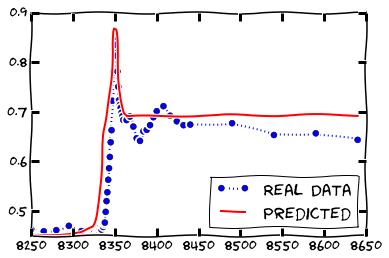

In [2]:
spectrum = pd.read_csv(os.path.join(SSRL_DIR, 'NCA_xanes.csv'),
                       index_col=0, sep=' ', names=['Absorbance'])
Es = np.array(spectrum.index)
As = np.array(spectrum.values)[:,0]
edge = xp.edges.NCANickelKEdge()
# Do the guessing
result = xp.xanes_math.guess_kedge(spectrum=As, energies=Es, edge=edge)
predicted_As = xp.xanes_math.predict_edge(Es, *result)

plt.plot(Es, As, marker='o', linestyle=":")
plt.plot(Es, predicted_As)
plt.legend(['Real Data', 'Predicted'], loc="lower right")

print(result)

Best Edge: 8350.0


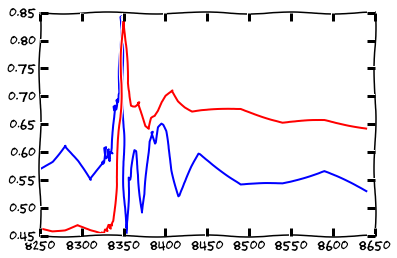

In [17]:
grad = np.gradient(As)
grad = (grad - np.min(grad)) / (np.max(grad) - np.min(grad))
grad = grad * (np.max(As) - np.min(As)) + np.min(As)
plt.plot(Es, grad)
plt.plot(Es, As)
print("Best Edge: {}".format(Es[np.argmax(As)]))

# Importing SSRL Dataset


In [3]:
xp.import_ssrl_frameset(directory=SSRL_DIR, hdf_filename='imported-ssrl-data.h5')

<Closed HDF5 group>

Automatic pdb calling has been turned OFF


XanesMathError: Could not find pre-edge (8249, 8281) in [[ 8324.  8354.]]

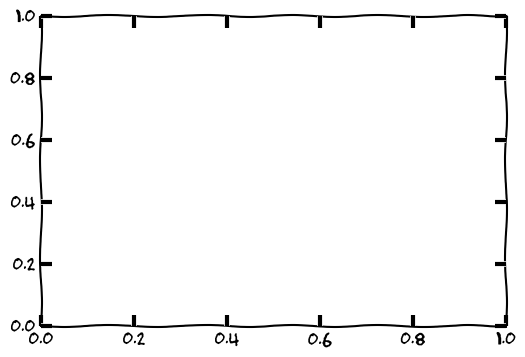

In [3]:

%pdb off
fs = xp.XanesFrameset(filename='imported-ssrl-data.h5',
                      edge=xp.k_edges['Ni_NCA'],
                     groupname='ssrl-test-data')
fs.qt_viewer()

## Particle Labeling and Segmentation

In [ ]:
fs = get_frame

Center: 8352.3149176
Goodness of fit: 0.002070405398038423


(8340, 8360)

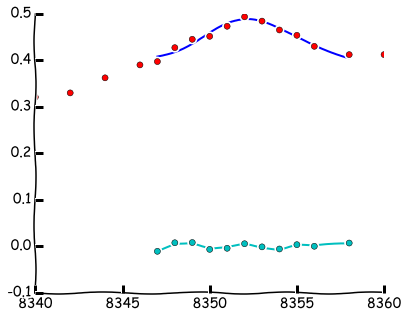

In [2]:
xanes_spectrum = pd.Series.from_csv('testdata/NCA-cell2-soc1-fov1-xanesspectrum.tsv', sep='\t')
(peak, goodness) = fit_whiteline(xanes_spectrum, width=5)  
peak.plot_fit()

fit = peak.fit_list[0]

print("Center:", peak.center())
print("Goodness of fit:", goodness)
residuals = peak.residuals(observations=xanes_spectrum[8347:8358])
xanes_spectrum.plot(ax=plt.gca(), marker='o', linestyle="None")
residuals.plot(ax=plt.gca(), marker='o')

plt.xlim(8340, 8360)

# Example Spectrum With K-edge Fitting

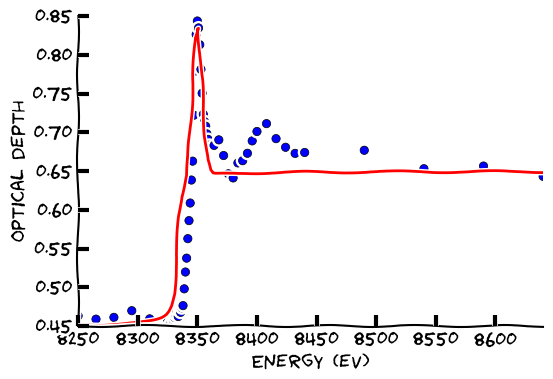

In [39]:
spectrum = pd.read_csv(os.path.join(SSRL_DIR, 'NCA_xanes.csv'),
                               index_col=0, sep=' ', names=['Absorbance'])
spectrum.plot(linestyle="None", marker="o")
plt.ylabel("Optical Depth")
plt.xlabel("Energy (eV)")
xp.plots.remove_extra_spines(plt.gca())
plt.legend().remove()

# Guess the starting parameters so fitting is more accurate
p0 = xp.xanes_math.guess_kedge(spectrum.values[:,0],
                               energies=spectrum.index,
                               edge=xanespy.k_edges['Ni_NCA'])
Es = np.linspace(8250, 8650, num=200)

predicted = xanespy.xanes_math.predict_edge(Es, *p0)
plt.plot(Es, predicted)

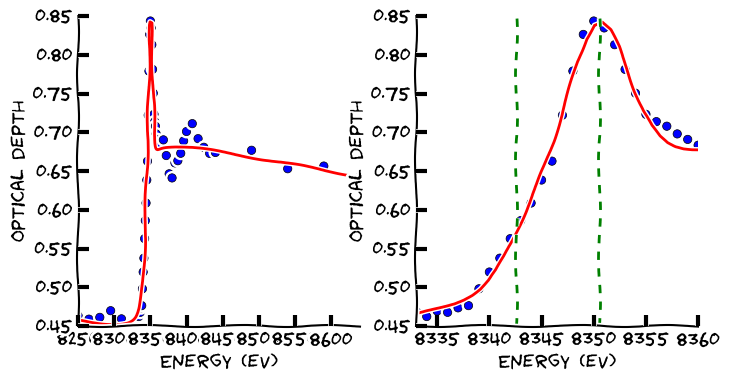

In [42]:
# Get the data
As = np.array([spectrum.values])[:,:,0]
Es = np.array([spectrum.index])

# Do the fitting
fit = xp.xanes_math.fit_kedge(spectra=As,
                              energies=Es,
                              p0=p0)

# Predict what the edge is from the fit parameters
energies = np.linspace(8250, 8640, num=500)
predicted = xp.xanes_math.predict_edge(energies, *fit[0])

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
spectrum.plot(ax=ax1, linestyle="None", marker='o')
spectrum.plot(ax=ax2, linestyle="None", marker='o')
ax1.plot(energies, predicted)
ax2.plot(energies, predicted)

# Put a line for the predicted whiteline position
params = xp.xanes_math.KEdgeParams(*fit[0])
ax2.axvline(x=params.E0, linestyle="--", color="green")
ax2.axvline(x=params.E0 + params.gb, linestyle="--", color="green")
ax2.set_xlim(8333, 8360)

# Clean up the plots
ax1.legend().remove()
ax2.legend().remove()
ax1.set_xlabel("Energy (eV)")
ax2.set_xlabel("Energy (eV)")
ax1.set_ylabel("Optical Depth")
ax2.set_ylabel("Optical Depth")
xp.plots.remove_extra_spines(ax1)
xp.plots.remove_extra_spines(ax2)